In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('aug_nine_var.xlsx')

In [4]:
X = df.iloc[:,1:22]
X_ = X
y = df.iloc[:,22:23].to_numpy()

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=21, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [8]:
hist = model.fit(X_train, y_train, epochs=5000, batch_size=8, validation_split=0.2, verbose=1,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000, verbose=1, restore_best_weights=True
))

Epoch 1/5000
32/32 [==============================] - 1s 9ms/step - loss: 1619.0482 - val_loss: 1218.0773
Epoch 2/5000
32/32 [==============================] - 0s 3ms/step - loss: 406.4044 - val_loss: 18.5598
Epoch 3/5000
32/32 [==============================] - 0s 3ms/step - loss: 22.6863 - val_loss: 15.0109
Epoch 4/5000
32/32 [==============================] - 0s 2ms/step - loss: 16.2552 - val_loss: 11.9422
Epoch 5/5000
32/32 [==============================] - 0s 2ms/step - loss: 14.9829 - val_loss: 11.0771
Epoch 6/5000
32/32 [==============================] - 0s 2ms/step - loss: 14.1747 - val_loss: 10.3143
Epoch 7/5000
32/32 [==============================] - 0s 2ms/step - loss: 13.1337 - val_loss: 9.5606
Epoch 8/5000
32/32 [==============================] - 0s 3ms/step - loss: 12.4612 - val_loss: 8.4354
Epoch 9/5000
32/32 [==============================] - 0s 3ms/step - loss: 10.6246 - val_loss: 7.2106
Epoch 10/5000
32/32 [==============================] - 0s 2ms/step - loss: 10.25

In [9]:
pred = model.predict(X)

model.save('dnn.h5')
np.save('val_0_06.npy', pred)

13/13 [==============================] - 0s 1ms/step


In [25]:
error = abs(y - pred)
error_sum = 0

for j in range(395):
    error_sum = error_sum + error[j]

In [27]:
error_sum / 395

array([0.01218793])

permultation

In [ ]:
train = pd.DataFrame(X_train)
train.columns = df.iloc[:,1:22].columns

In [ ]:
train.columns = ["합계 출산율", "국내 총인구", "서울시 인구", "경기도 인구", "인천시 인구", "수도권 인구", "신생아 출산 인구", "사망 인구", "혼인 건수", "이혼 건수", "소비자 물가", "농축 수산물", "공업 제품", "집세", "공공 서비스", "개인 서비스", "소비자 물가 지수", "금리", "원 달러 환율", "국제 유가", "국내 총생산"]

In [ ]:
from sklearn.inspection import permutation_importance # sklearn 22 버전부터 해당
from sklearn.metrics import make_scorer

# MAPE
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# fix_model : 훈련된 모델
# X_train : 훈련데이터 Feature
# y_train : 훈련데이터 Target
# scoring : Feature 를 Shuffler 한 뒤, 예측값과 실제값을 어떤 Metric 을 사용해 비교할지
# n_repeats : 특정 Feature 를 몇번 Shuffle 할 것인지
# random_state : 난수 고정
result = permutation_importance(model, X_train, y_train, scoring = make_scorer(mean_absolute_percentage_error,greater_is_better=False),
                            n_repeats=3,
                            random_state=0)
# Feature label
Feature = train

# Feature 중요도를 오름차순으로 정렬한 뒤, 해당 Feature 의 index 를 저장
sorted_result = result.importances_mean.argsort()

# 결과를 DataFrame 화
importances = pd.DataFrame(result.importances_mean[sorted_result], index=Feature.columns[sorted_result]).sort_values(0, ascending=False)   
importances

10/10 [==============================] - 0s 2ms/step


,0
경기도 인구,9.191790
국내 총생산,9.130494
수도권 인구,6.201633
국내 총인구,4.549150
인천시 인구,4.015658
소비자 물가 지수,2.570611
금리,2.097962
집세,1.471888
서울시 인구,1.240852
원 달러 환율,1.133239


그래프는 JBK 코드 참조

In [ ]:
importances.to_csv('importances.csv')

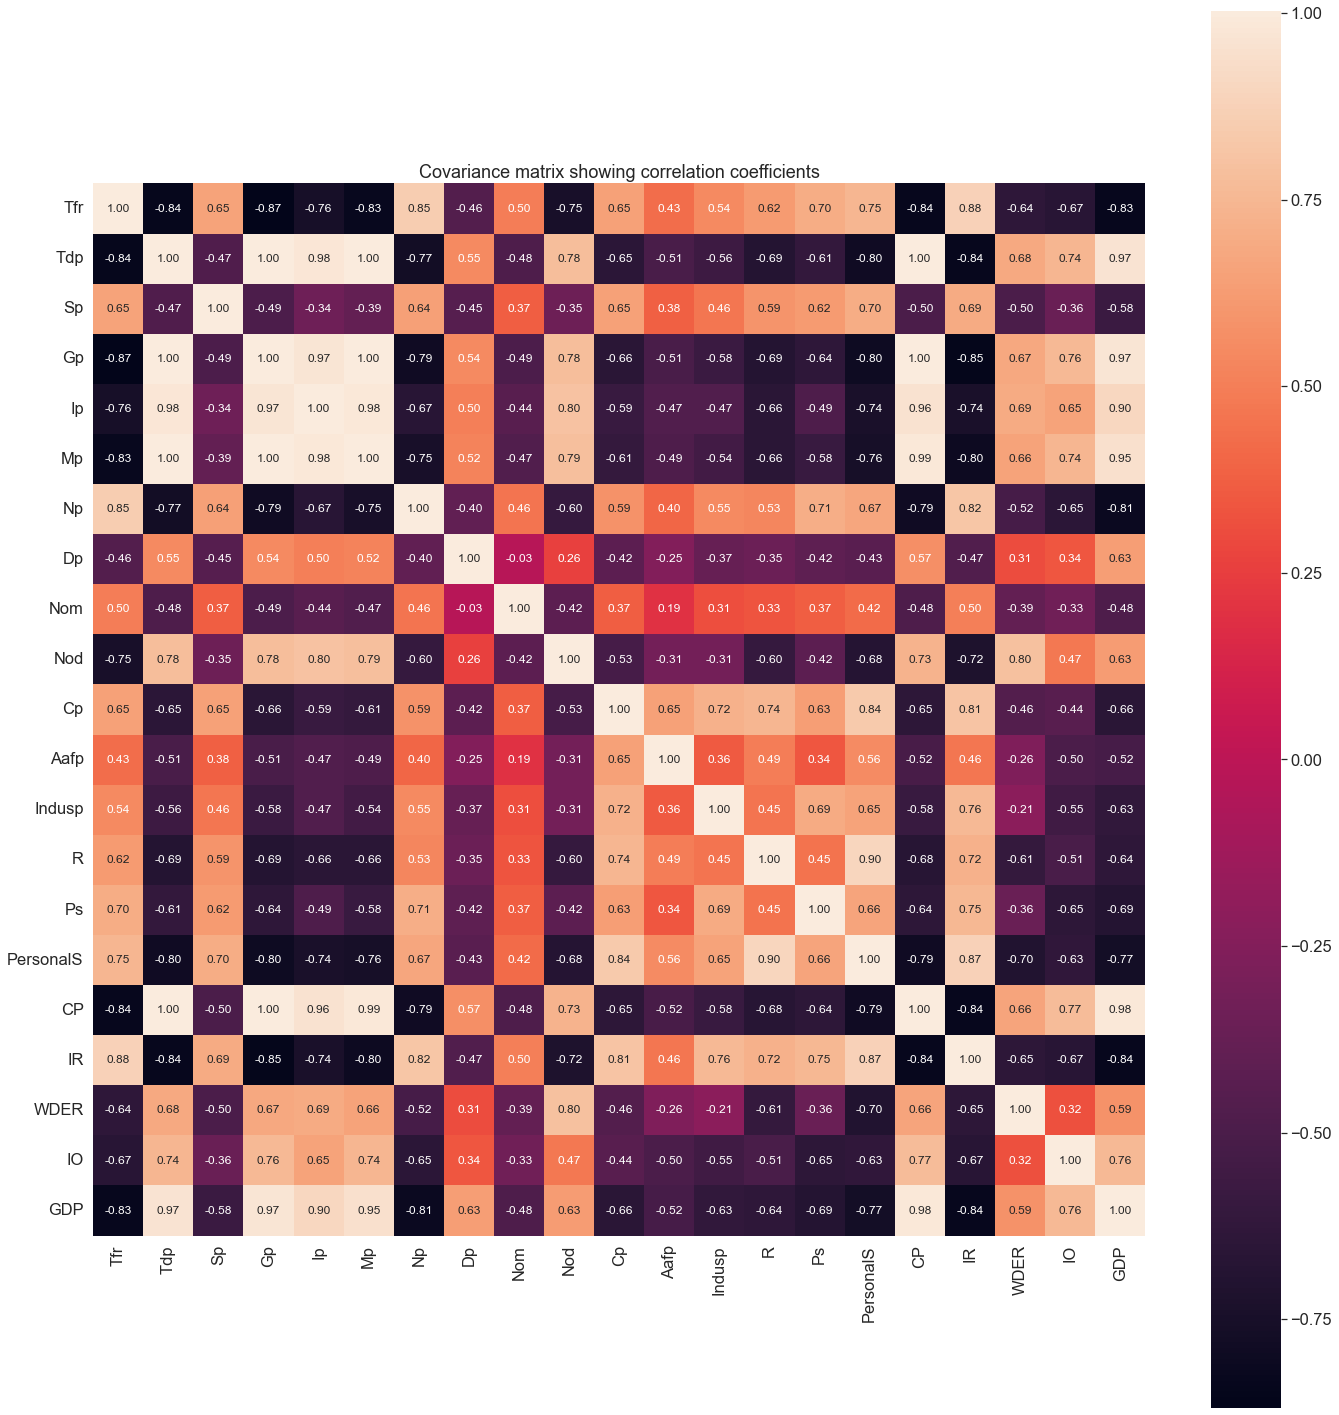

In [ ]:
import seaborn as sns
cov_mat =np.cov(X.T)
cols = ['Tfr', 'Tdp', 'Sp', 'Gp', 'Ip', 'Mp', 'Np',
       'Dp', 'Nom', 'Nod', 'Cp', 'Aafp', 'Indusp', 'R', 'Ps',
       'PersonalS', 'CP', 'IR', 'WDER', 'IO', 'GDP']
plt.rcParams['font.family'] = 'Gulim'
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

395


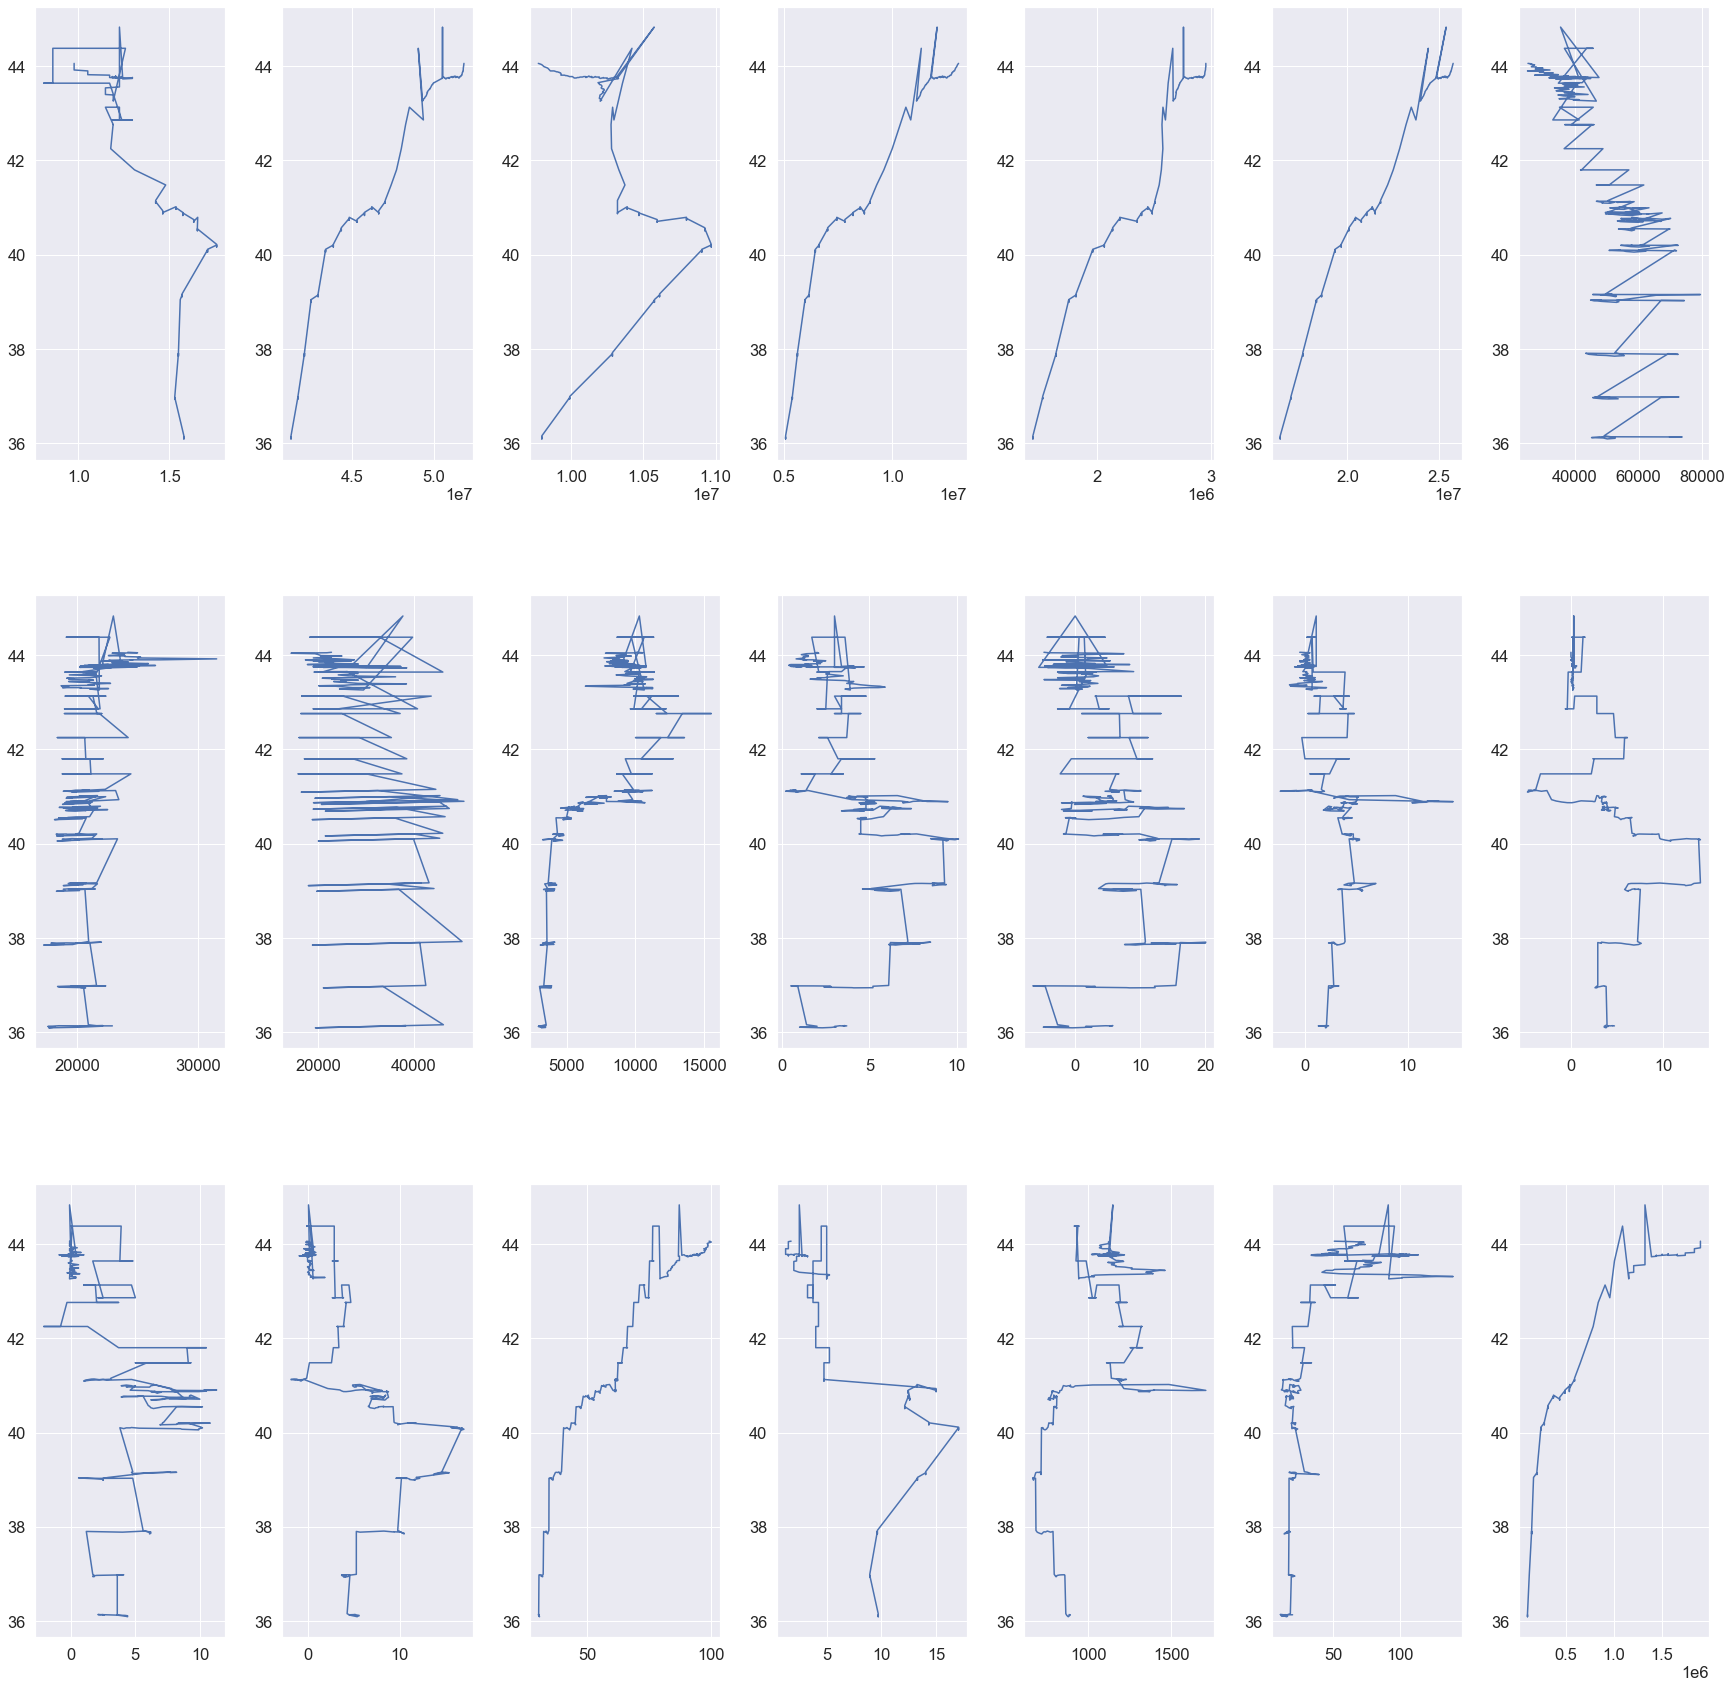

In [ ]:
X = scaler.inverse_transform(X)

arr = []
x_ = []

for j in range(21):
    for i in range(395):
        x_.append(X[i][j])
    arr.append(x_)
    x_ = []
    
arr = np.array(arr)
print(len(arr[0]))

for i in range(len(arr)):
    for j in range(len(arr)):
        if np.array_equal(arr[i], arr[j]):
            if i != j:
                print(i, j)
    
f, axes = plt.subplots(3, 7)
f.set_size_inches((30, 30))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

cnt = 0

for i in range(3):
    for j in range(7):
        axes[i][j].plot(arr[cnt], y)
        cnt = cnt + 1

plt.show()
